# _MiSTree Tutorial 2_ - Minimum Spanning Trees

## (1) _Basic Usage_

To construct the minimum spanning tree (MST) from a data set we will usually
interact with the ``get_mst`` class. Unless you need to do something more sophisticated
with the MST you will not need to use the internal functions that are used by the class.

To initiate the class we will run:

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pylab as plt
import mistree as mist

### (1.1) _Initialising_
#### _In 2D_

In [2]:
x = np.random.random_sample(1000)
y = np.random.random_sample(1000)

mst = mist.GetMST(x=x, y=y)

#### _In 3D_

In [3]:
x = np.random.random_sample(1000)
y = np.random.random_sample(1000)
z = np.random.random_sample(1000)

mst = mist.GetMST(x=x, y=y, z=z)

#### _In Tomographic Coordinates_

We generate a uniform random distribution on the sphere.

In [4]:
phi = 360.*np.random.random_sample(1000)
theta = np.rad2deg(np.arccos(1.-2.*np.random.random_sample(1000)))

mst = mist.GetMST(phi=phi, theta=theta)

#### _In Tomographic Celestial Coordinates_

Once again using a uniform random distribution on the sphere.

In [5]:
ra = 360.*np.random.random_sample(1000)
dec = np.rad2deg(np.arccos(1.-2.*np.random.random_sample(1000))) - 90.

mst = mist.GetMST(ra=ra, dec=dec)

#### _In Spherical Polar Coordinates_

This generates a uniform distribution of points with a sphere of radius 10.

In [6]:
phi = 360.*np.random.random_sample(1000)
theta = np.rad2deg(np.arccos(1.-2.*np.random.random_sample(1000)))
r = 10.*(np.random.random_sample(1000))**(1./3.)

mst = mist.GetMST(phi=phi, theta=theta, r=r)

#### _In Spherical Celestial Coordinates_

This generates a uniform distribution of points with a sphere of radius 10.

In [7]:
ra = 360.*np.random.random_sample(1000)
dec = np.rad2deg(np.arccos(1.-2.*np.random.random_sample(1000))) - 90.
r = 10.*np.random.random_sample(1000)**(1./3.)

mst = mist.GetMST(ra=ra, dec=dec, r=r)

### (1.2) _Measure MST statistics_

And to construct the MST and output the MST statistics: degree (d), edge length (l),
branch length (b) and branch shape (s):

In [8]:
x = np.random.random_sample(1000)
y = np.random.random_sample(1000)

mst = mist.GetMST(x=x, y=y)

d, l, b, s = mst.get_stats()

If you would also like the edge (``l_index``) and branch index (``b_index``),
this can be done in two ways:

In [9]:
d, l, b, s, l_index, b_index = mst.get_stats(include_index=True)

# alternatively:

d, l, b, s = mst.get_stats()
l_index = mst.edge_index
b_index = mst.branch_index

The edge index (``l_index``) is a 2 dimensional array, indicating the pair of nodes
that make up each edge. The branch index are list of the member edges in each branches.

### (1.3) _Plotting the MST_

#### _Plotting Edges_

To plot the MST, i.e. the nodes and edges you can use the following piece of python code
where we plot a set of 2D random points:

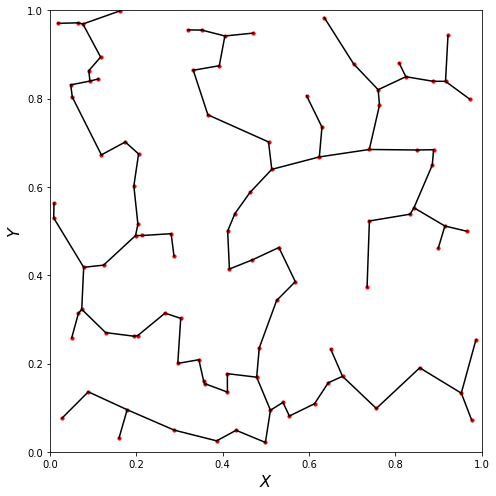

In [10]:
x = np.random.random_sample(100)
y = np.random.random_sample(100)

mst = mist.GetMST(x=x, y=y)
d, l, b, s, l_index, b_index = mst.get_stats(include_index=True)

plt.figure(figsize=(7., 7.))

# plotting nodes:
plt.scatter(x, y, s=10, color='r')

# plotting MST edges:
plt.plot([x[l_index[0]], x[l_index[1]]],
         [y[l_index[0]], y[l_index[1]]],
         color='k')

plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.xlabel(r'$X$', size=16)
plt.ylabel(r'$Y$', size=16)
plt.tight_layout()
plt.show()

#### _Plotting Branches_

If you would also like to plot branches then you can use the following piece of python code:

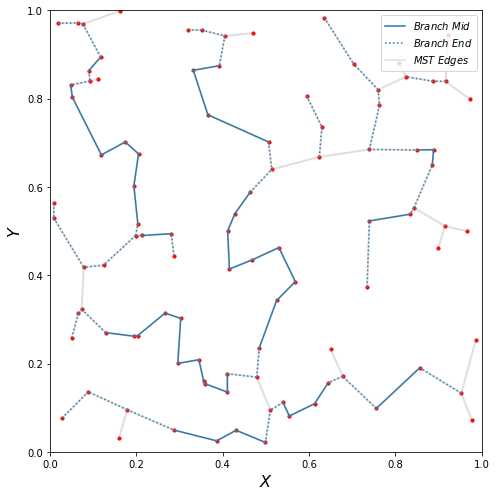

In [11]:
plt.figure(figsize=(7., 7.))

# plotting nodes:
plt.scatter(x, y, s=10, color='r')

# plotting branches:
for i in range(0, len(b_index)):
    plt.plot([x[l_index[0][b_index[i][0]]], x[l_index[1][b_index[i][0]]]],
             [y[l_index[0][b_index[i][0]]], y[l_index[1][b_index[i][0]]]],
             color='C0', linestyle=':')
    plt.plot([x[l_index[0][b_index[i][1:-1]]], x[l_index[1][b_index[i][1:-1]]]],
             [y[l_index[0][b_index[i][1:-1]]], y[l_index[1][b_index[i][1:-1]]]],
             color='C0')
    plt.plot([x[l_index[0][b_index[i][-1]]], x[l_index[1][b_index[i][-1]]]],
             [y[l_index[0][b_index[i][-1]]], y[l_index[1][b_index[i][-1]]]],
             color='C0', linestyle=':')

# ploting MST edges:
plt.plot([x[l_index[0]], x[l_index[1]]],
         [y[l_index[0]], y[l_index[1]]],
         color='grey', linewidth=2, alpha=0.25)

plt.plot([], [], color='C0', label=r'$Branch$ $Mid$')
plt.plot([], [], color='C0', label=r'$Branch$ $End$', linestyle=':')
plt.plot([], [], color='grey', alpha=0.25, label=r'$MST$ $Edges$')
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.xlabel(r'$X$', size=16)
plt.ylabel(r'$Y$', size=16)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## (2) _Binning and Plotting_

### (2.1) _Quick Bin and Plot_

A very simple plot of the MST summary statistics can be generated using:

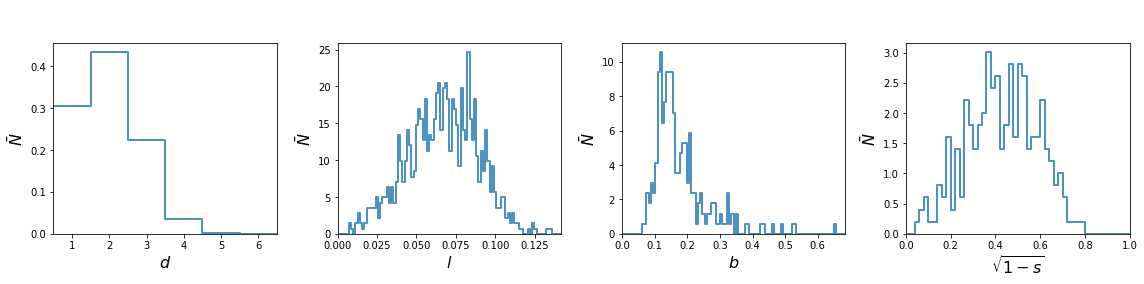

In [12]:
x = np.random.random_sample(1000)
y = np.random.random_sample(1000)
z = np.random.random_sample(1000)

mst = mist.GetMST(x=x, y=y, z=z)
d, l, b, s = mst.get_stats()

# begins by binning the data and storing this in a dictionary.
hmst = mist.HistMST()
hmst.setup()
mst_dict = hmst.get_hist(d, l, b, s)

# plotting which takes as input the dictionary created before.
pmst = mist.PlotHistMST()
pmst.read_mst(mst_dict)
pmst.plot()

The first ``HistMST`` class bins the data and stores it as a dictionary and the
``PlotHistMST`` class is used make the plot.

### (2.1) _Binning_

Once we have created the data set we need to bin the data. This is done by first
initialising the ``HistMST`` class and then setting it up. The most simple case
(using the default settings) is shown below.

In [13]:
hmst = mist.HistMST()
hmst.setup()

We can make the following changes:

In [14]:
# to bin in log_10(l) and log_10(b) rather than just l and b:
hmst.setup(uselog=True)

# to bin using s rather than sqrt(1-s)
hmst.setup(use_sqrt_s=False)

# to output the unnormalised histograms (i.e. just counts)
hmst.setup(usenorm=False)

# to change the range of the binning, the number of bins, etc:

# for the degree, although this is rarely necessary, please ensure the minimum
# and maximum are half integers and the number of bins is equal to maximum-minimum.
hmst.setup(d_min=0.5, d_max=6.5, num_d_bins=6) # these are the default values.

# for edge lengths, note the default values are l_min=0., l_max=1.05*l.max()
# and ``num_l_bins=100``.
hmst.setup(l_min=0., l_max=10., num_l_bins=100)

# for edge lengths, note the default value are b_min=0. and b_max=1.05*b.max()
# and ``num_b_bins=100``.
hmst.setup(b_min=0., b_max=10., num_b_bins=100)

# for branch shape in either projections the range can be altered by changing the following,
# however it will rarely be necessary to change from the default values of s_min=0 and s_max=1.,
# but you may want to alter the binning (default is 50).
hmst.setup(s_min=0., s_max=1., num_s_bins=50)

# if you are instead using $log_{10}l$ and $log_{10}b$ then you would specify the range
# by using the following but note the binning still uses num_l_bins and num_b_bins.
hmst.setup(logl_min=-2., logl_max=4., logb_min=-1, logb_max=5.)

Once this is done we can actually pass the MST statistics to the class and create a dictionary
of the binned statistics:

In [15]:
hmst = mist.HistMST()
hmst.setup(uselog=True)
mst_dict = hmst.get_hist(d, l, b, s)

The dictionary created is stored with the following entries:

In [16]:
print(mst_dict.keys())

['x_d', 'x_b', 'use_sqrt_s', 'x_l', 'usenorm', 'x_s', 'uselog', 'y_s', 'isgroup', 'y_l', 'y_d', 'y_b']


- ``uselog`` : stores whether the bins for l and b are in logs.
- ``use_sqrt_s`` : stores whether the the bins for s are in s or sqrt(1-s)
- ``usenorm`` : stores whether the histograms are normalised.
- ``isgroup`` : stores whether the histogram come from a group of histograms (discussed later)
- ``x_d`` : bin centres for degree
- ``y_d`` : bin heights for degree
- ``x_l`` : bin centres for edge length
- ``y_l`` : bin heights for edge length
- ``x_b`` : bin centres for branch length
- ``y_b`` : bin heights for branch length
- ``x_s`` : bin centres for branch shape
- ``y_s`` : bin heights for branch shape

Finally, if we want to instead store the ensemble mean and standard deviation of a group of MSTs we would
add the individual MST to ``HistMST`` class in the following way:

In [17]:
hmst = mist.HistMST()
hmst.setup(uselog=True)
hmst.start_group() # this tells HistMST to store the individual binned MST statistics

for i in range(0, 10):

    # Read or measure MST statistics, we will use the default levy flight distribution here
    
    x, y, z = mist.get_levy_flight(50000)
    
    mst = mist.GetMST(x=x, y=y, z=z)
    d, l, b, s = mst.get_stats()
    # we use it just as we did before, where the outputted dictionary is for that single
    # realisation

    mst_dict = hmst.get_hist(d, l, b, s)
    
    print(i+1, '/ 10')

# to output the mean and standard deviation of the ensemble histograms.

mst_dict_group = hmst.end_group()

# you must use hmst.start_group() to start collecting MST statistics from another group
# otherwise this will continue collecting histograms for the current group

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


Similarly to before the dictionary contains many of the same elements with some additional ones.

In [18]:
print(mst_dict_group.keys())

['y_d_std', 'x_d', 'y_b_std', 'x_b', 'use_sqrt_s', 'uselog', 'y_l_std', 'x_l', 'y_s', 'isgroup', 'y_s_std', 'y_l', 'usenorm', 'x_s', 'y_d', 'y_b']


- ``y_d_std`` : standard deviation for the bin heights for degree
- ``y_l_std`` : standard deviation for the bin heights for edge length
- ``y_b_std`` : standard deviation for the bin heights for branch length
- ``y_s_std`` : standard deviation for the bin heights for branch shape

This makes the assumption that the counts follow a Gaussian distribution, since these
are counts this actually follows a discrete Poisson distribution but for large values
a Gaussian is an appropriate approximation (usually greater than 50 should be okay).
This is important to consider if you use these summary statistics in regions where
the counts are small.

### (2.2) _Plotting_

For the following plots we will change the default matplotlib font using:

In [19]:
mist.set_plot_default()

You can choose to use this as well or use the default matplotlib fonts.

Once we have the binned MST dictionary we can plot it very simply using ``PlotHistMST`` class:

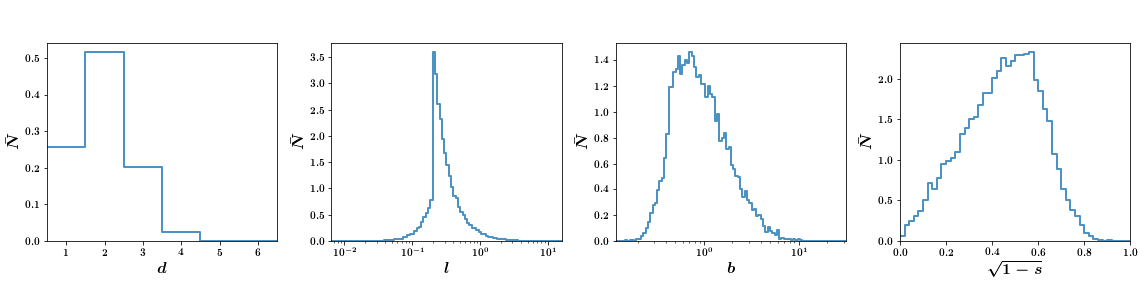

In [20]:
pmst = mist.PlotHistMST()
pmst.read_mst(mst_dict)
pmst.plot()

To alter how the plot looks we can alter the following:

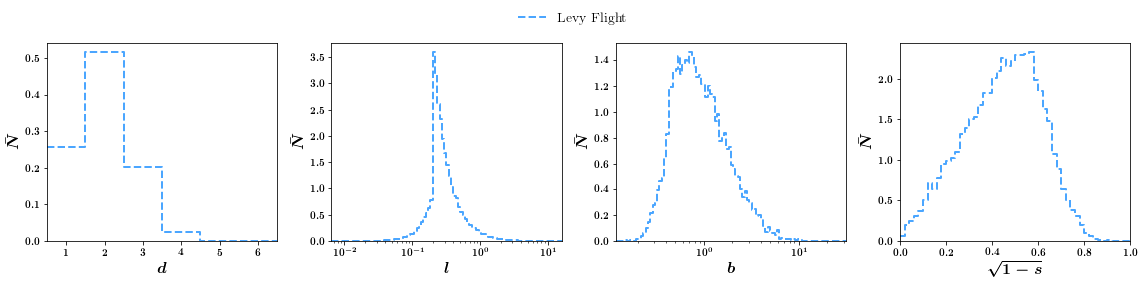

In [21]:
pmst = mist.PlotHistMST()
pmst.read_mst(mst_dict, color='Dodgerblue', linewidth=2., linestyle='--', alpha=0.8,
             label='Levy Flight')
pmst.plot()

To change from the default box binned plots to smooth lines (excluding degree):

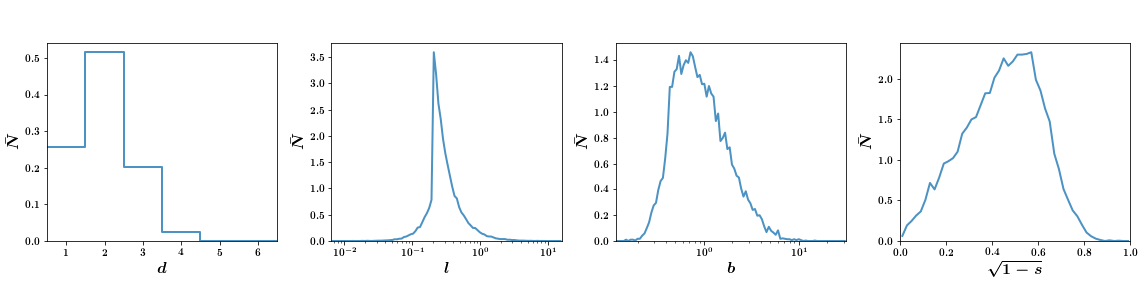

In [22]:
pmst = mist.PlotHistMST()
pmst.read_mst(mst_dict)
pmst.plot(usebox=False)

Comparing randoms points, a Levy-Flight distribution and adjusted Levy-Flight distribution:

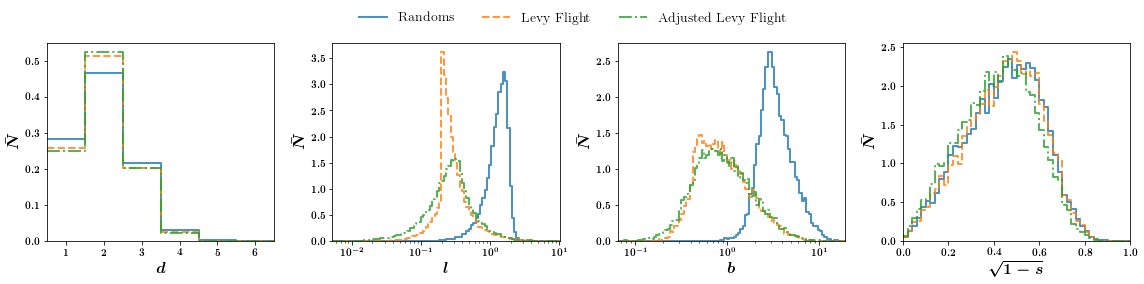

In [23]:
# We first create a random distribution
x_r = 75.*np.random.random_sample(50000)
y_r = 75.*np.random.random_sample(50000)
z_r = 75.*np.random.random_sample(50000)

# a levy flight distribution
x_lf, y_lf, z_lf = mist.get_levy_flight(50000)

# an adjusted levy flight distribution
x_alf, y_alf, z_alf = mist.get_adjusted_levy_flight(50000)

# then construct and measure the MST for each distribution
mst = mist.GetMST(x=x_r, y=y_r, z=z_r)
d_r, l_r, b_r, s_r = mst.get_stats()

mst = mist.GetMST(x=x_lf, y=y_lf, z=z_lf)
d_lf, l_lf, b_lf, s_lf = mst.get_stats()

mst = mist.GetMST(x=x_alf, y=y_alf, z=z_alf)
d_alf, l_alf, b_alf, s_alf = mst.get_stats()

# bin the MST statistics
hmst = mist.HistMST()
hmst.setup(uselog=True)
hist_alf = hmst.get_hist(d_alf, l_alf, b_alf, s_alf)
hist_lf = hmst.get_hist(d_lf, l_lf, b_lf, s_lf)
hist_r = hmst.get_hist(d_r, l_r, b_r, s_r)

# and plot it
pmst = mist.PlotHistMST()
pmst.read_mst(hist_r, label='Randoms')
pmst.read_mst(hist_lf, label='Levy Flight')
pmst.read_mst(hist_alf, label='Adjusted Levy Flight')
pmst.plot()

We can plot difference subplots:

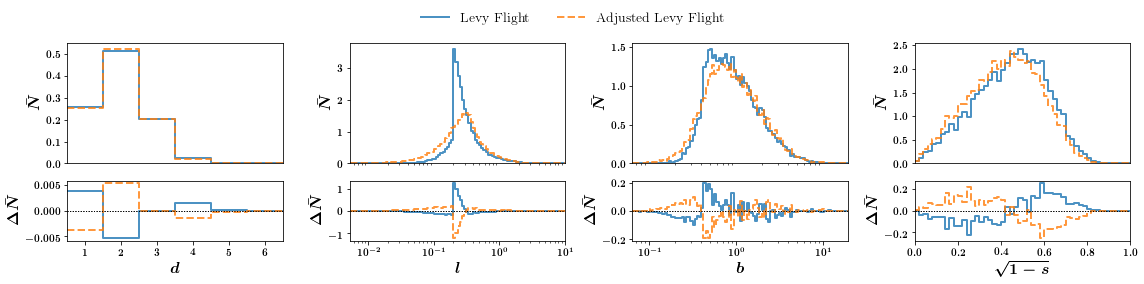

In [24]:
pmst = mist.PlotHistMST()
pmst.read_mst(hist_lf, label='Levy Flight')
pmst.read_mst(hist_alf, label='Adjusted Levy Flight')
pmst.plot(usecomp=True)

Finally plotting the histogram for a group works in the very same way except we
pass the dictionary of a group. The final plot has 1 sigma error bars.

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


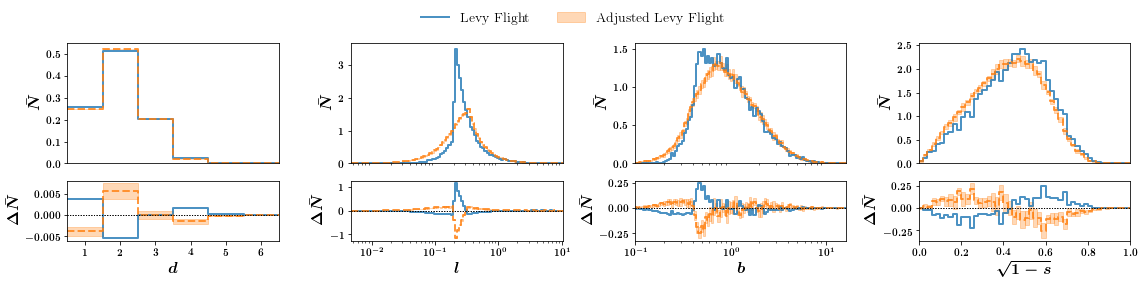

In [25]:
hmst = mist.HistMST()
hmst.setup(uselog=True)

hist_lf = hmst.get_hist(d_lf, l_lf, b_lf, s_lf)

hmst.start_group()

for i in range(0, 10):

    x_alf, y_alf, z_alf = mist.get_adjusted_levy_flight(50000)

    mst = mist.GetMST(x=x_alf, y=y_alf, z=z_alf)
    d_alf, l_alf, b_alf, s_alf = mst.get_stats()

    _hist_alf = hmst.get_hist(d_alf, l_alf, b_alf, s_alf)
    
    print(i+1, '/ 10')

hist_alf_group = hmst.end_group()

pmst = mist.PlotHistMST()
pmst.read_mst(hist_lf, label='Levy Flight')
pmst.read_mst(hist_alf_group, label='Adjusted Levy Flight')
pmst.plot(usecomp=True)

## (3) _Advanced Usage_


### (3.1) _k Nearest Neighbours_

The k-nearest neighbour graph is a spanning graph which is passed on to the
``scipy`` kruskal algorithm. The actual graph is constructed using the ``scikit-learn``
``kneighbors_graph`` and by default will include the nearest 20 neighbours to
each node. We can specify the number of nearest neighbours (we will set this to 30)
in the following way:

In [26]:
x = np.random.random_sample(1000)
y = np.random.random_sample(1000)

mst = mist.GetMST(x=x, y=y) # Assuming our input data set is 2D.
mst.define_k_neighbours(30)
d, l, b, s = mst.get_stats()

# or directly:

mst = mist.GetMST(x=x, y=y) # Assuming our input data set is 2D.
d, l, b, s = mst.get_stats(k_neighbours=30)

Note: changing ``k`` to larger values will result in longer computation time to construct
the MST.

### (3.2) _Scale Cuts_

In cosmological data sets we often need to remove small scales due to numerical
simulation or observational limitations. To remove this we carry out
the following:

In [27]:
x = np.random.random_sample(100000)
y = np.random.random_sample(100000)

mst = mist.GetMST(x=x, y=y)
mst.scale_cut(0.002)
d, l, b, s = mst.get_stats()

# or directly:

mst = mist.GetMST(x=x, y=y)
d, l, b, s = mst.get_stats(scale_cut_length=0.002)